In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("../Datos/Rest-Mex_2025_train.csv",encoding="utf-8")
df.head()

,Title,Review,Polarity,Town,Region,Type
0,Mi Lugar Favorito!!!!,Excelente lugar para comer y pasar una buena n...,5.0,Sayulita,Nayarit,Restaurant
1,lugares interesantes para visitar,"andar mucho, así que un poco difícil para pers...",4.0,Tulum,QuintanaRoo,Attractive
2,No es el mismo Dreams,"Es nuestra cuarta visita a Dreams Tulum, elegi...",3.0,Tulum,QuintanaRoo,Hotel
3,un buen panorama cerca de Cancún,"Estando en Cancún, fuimos al puerto y tomamos ...",4.0,Isla_Mujeres,QuintanaRoo,Attractive
4,El mejor,Es un lugar antiguo y por eso me encanto tiene...,5.0,Patzcuaro,Michoacan,Hotel


In [4]:
df.Region.unique()

array(['Nayarit', 'QuintanaRoo', 'Michoacan', 'Chiapas',
       'Estado_de_Mexico', 'Chihuahua', 'Guerrero', 'Yucatan', 'Puebla',
       'Queretaro', 'Jalisco', 'Baja_CaliforniaSur', 'Coahuila',
       'Veracruz', 'Hidalgo', 'Morelos', 'San_Luis_Potosi', 'Oaxaca',
       'Guanajuato'], dtype=object)

In [5]:
df.Town.unique()

array(['Sayulita', 'Tulum', 'Isla_Mujeres', 'Patzcuaro', 'Palenque',
       'Valle_de_Bravo', 'Ixtapan_de_la_Sal', 'Creel', 'Taxco',
       'Valladolid', 'Izamal', 'San_Cristobal_de_las_Casas', 'Atlixco',
       'Tequisquiapan', 'Ajijic', 'Teotihuacan', 'Tequila', 'Bacalar',
       'TodosSantos', 'Parras', 'Coatepec', 'Huasca_de_Ocampo',
       'Tepoztlan', 'Cholula', 'Cuatro_Cienegas', 'Metepec', 'Loreto',
       'Orizaba', 'Tlaquepaque', 'Cuetzalan', 'Bernal', 'Xilitla',
       'Malinalco', 'Real_de_Catorce', 'Chiapa_de_Corzo', 'Mazunte',
       'Tepotzotlan', 'Zacatlan', 'Dolores_Hidalgo', 'Tapalpa'],
      dtype=object)

In [6]:
df.Town.value_counts()

Town
Tulum                         45345
Isla_Mujeres                  29826
San_Cristobal_de_las_Casas    13060
Valladolid                    11637
Bacalar                       10822
Palenque                       9512
Sayulita                       7337
Valle_de_Bravo                 5959
Teotihuacan                    5810
Loreto                         5525
TodosSantos                    4600
Patzcuaro                      4454
Taxco                          4201
Tlaquepaque                    4041
Ajijic                         3752
Tequisquiapan                  3627
Metepec                        3532
Tepoztlan                      3445
Cholula                        2790
Tequila                        2650
Orizaba                        2521
Izamal                         2041
Creel                          1786
Ixtapan_de_la_Sal              1696
Zacatlan                       1602
Huasca_de_Ocampo               1509
Mazunte                        1466
Xilitla                

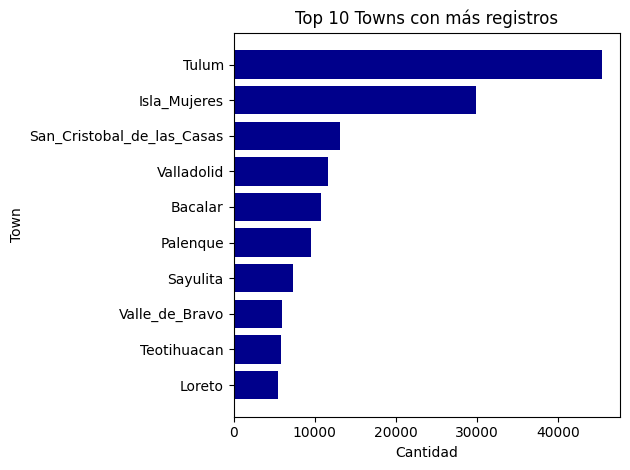

In [7]:
import matplotlib.pyplot as plt

top_towns = df['Town'].value_counts()[:10][::-1]

plt.barh(top_towns.index, top_towns.values, color='darkblue')
plt.title('Top 10 Towns con más registros')
plt.xlabel('Cantidad')
plt.ylabel('Town')
plt.tight_layout()
plt.show()

In [8]:
print(len(df))
df.Town

208051


0                  Sayulita
1                     Tulum
2                     Tulum
3              Isla_Mujeres
4                 Patzcuaro
                ...        
208046        Tequisquiapan
208047                Tulum
208048    Ixtapan_de_la_Sal
208049                Creel
208050            Tepoztlan
Name: Town, Length: 208051, dtype: object

In [9]:
df.Town.value_counts()

Town
Tulum                         45345
Isla_Mujeres                  29826
San_Cristobal_de_las_Casas    13060
Valladolid                    11637
Bacalar                       10822
Palenque                       9512
Sayulita                       7337
Valle_de_Bravo                 5959
Teotihuacan                    5810
Loreto                         5525
TodosSantos                    4600
Patzcuaro                      4454
Taxco                          4201
Tlaquepaque                    4041
Ajijic                         3752
Tequisquiapan                  3627
Metepec                        3532
Tepoztlan                      3445
Cholula                        2790
Tequila                        2650
Orizaba                        2521
Izamal                         2041
Creel                          1786
Ixtapan_de_la_Sal              1696
Zacatlan                       1602
Huasca_de_Ocampo               1509
Mazunte                        1466
Xilitla                

## PLN

In [10]:
# Buscar palabras clave en Review o Título y crear un DataFrame conjunto
palabras_clave = ['seguridad','robo','inseguro','amenaza','peligro','robado','asalto','violento','policía','seguro','ratero','alerta']
col_texto = None
for col in df.columns:
    if 'review' in col.lower() or 'comentario' in col.lower() or 'text' in col.lower():
        col_texto = col
        break
col_titulo = None
for col in df.columns:
    if 'title' in col.lower() or 'título' in col.lower():
        col_titulo = col
        break
if col_texto is None and col_titulo is None:
    print('No se encontró columna de texto ni de título')
else:
    filtro_texto = df[col_texto].str.contains('|'.join(palabras_clave), case=False, na=False) if col_texto else pd.Series([False]*len(df))
    filtro_titulo = df[col_titulo].str.contains('|'.join(palabras_clave), case=False, na=False) if col_titulo else pd.Series([False]*len(df))
    filtro_seguridad = filtro_texto | filtro_titulo
    df_seguridad = df[filtro_seguridad]
    print(f"Total de registros con palabras clave en título o review: {len(df_seguridad)}")
    display(df_seguridad.head(20))

Total de registros con palabras clave en título o review: 10157


,Title,Review,Polarity,Town,Region,Type
9,Buena Ubicación y limpio,estuvimoa hospedados para participar en el eve...,4.0,Palenque,Chiapas,Hotel
58,"La cálida hospitalidad, comida fabulosa!",La calidad de la comida es excelente. Los anfi...,5.0,Isla_Mujeres,QuintanaRoo,Restaurant
62,Estancia increíble en Tulum,¡Me encantó Alaya Tulum! Me divertí mucho qued...,5.0,Tulum,QuintanaRoo,Hotel
88,Fácil acceso público,"Una playa excelente, no fue difí­cil de acceso...",4.0,Isla_Mujeres,QuintanaRoo,Attractive
127,Cocina única con local/gustos prehispánicos,Usted debe llamar con anticipación para hacer ...,4.0,Palenque,Chiapas,Restaurant
192,NOS ROBARON DE LA CAJA FUERTE. MALTRATAN AL HU...,EXPERIENCIA HORRIBLE. Nos robaron todo el dine...,1.0,Tulum,QuintanaRoo,Hotel
199,Visita de miel,"En primer lugar, permítanme decir que este hot...",4.0,Isla_Mujeres,QuintanaRoo,Hotel
200,Interesante paseo por el rio,El paseo y reserva ecologica del rio es un lug...,4.0,Orizaba,Veracruz,Attractive
236,Cancelado nuestro primer viaje y aplicaron el ...,"Si quieres hablar sobre servicio al cliente, t...",5.0,Isla_Mujeres,QuintanaRoo,Hotel
267,Por una razón más concurridas,"Este fue, por lejos, una de las mejores comida...",5.0,Valladolid,Yucatan,Restaurant


In [11]:
display(df_seguridad[[col_texto, col_titulo]].head(30))

,Review,Title
9,estuvimoa hospedados para participar en el eve...,Buena Ubicación y limpio
58,La calidad de la comida es excelente. Los anfi...,"La cálida hospitalidad, comida fabulosa!"
62,¡Me encantó Alaya Tulum! Me divertí mucho qued...,Estancia increíble en Tulum
88,"Una playa excelente, no fue difí­cil de acceso...",Fácil acceso público
127,Usted debe llamar con anticipación para hacer ...,Cocina única con local/gustos prehispánicos
192,EXPERIENCIA HORRIBLE. Nos robaron todo el dine...,NOS ROBARON DE LA CAJA FUERTE. MALTRATAN AL HU...
199,"En primer lugar, permítanme decir que este hot...",Visita de miel
200,El paseo y reserva ecologica del rio es un lug...,Interesante paseo por el rio
236,"Si quieres hablar sobre servicio al cliente, t...",Cancelado nuestro primer viaje y aplicaron el ...
267,"Este fue, por lejos, una de las mejores comida...",Por una razón más concurridas


### Análisis de sentimiento con VADER (requiere traducción a inglés si el texto está en español)

In [12]:
#pip install pandas nltk vaderSentiment googletrans==4.0.0rc1

In [13]:
#pip install --upgrade googletrans==4.0.0rc1 vaderSentiment

In [14]:
#pip install transformers

In [15]:
from pysentimiento import create_analyzer
an = create_analyzer(task="sentiment", lang="es")
df_seguridad['sentimiento'] = df_seguridad[col_texto].fillna("").apply(lambda t: an.predict(t).output)

c:\Users\emils\Desktop\LCD\Séptimo\Minería\Proyecto_final\analisis_de_sentimientos_pueblos_magicos\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\emils\AppData\Local\Temp\ipykernel_20444\743141157.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seguridad['sentimiento'] = df_seguridad[col_texto].fillna("").apply(lambda t: an.predict(t).output)


In [16]:
df_seguridad.sentimiento.value_counts()

sentimiento
POS    8061
NEG    1262
NEU     834
Name: count, dtype: int64

In [ ]:
# Función para mapear probabilidades a 5 niveles
def proba_to_5(result):
    # result es el objeto retornado por an.predict(text)
    probas = getattr(result, 'probas', None)
    if not probas:
        return None
    pos = probas.get('POS', 0.0)
    neu = probas.get('NEU', 0.0)
    neg = probas.get('NEG', 0.0)
    score = pos - neg
    # Umbrales ajustables: puedes modificarlos según prefieras
    return score

# Aplicar al DataFrame y crear nueva columna 'sentimiento_5'
df_seguridad['sentimiento_5'] = df_seguridad[col_texto].fillna("").apply(lambda t: proba_to_5(an.predict(t)))

# Mostrar conteos por categoría y algunos ejemplos
print(df_seguridad['sentimiento_5'].value_counts(dropna=False))
display(df_seguridad[[col_texto, 'sentimiento', 'sentimiento_5']].head(20))

sentimiento_5
 0.767199    2
 0.974382    2
 0.551070    2
 0.967826    2
 0.973735    2
            ..
 0.957943    1
-0.877644    1
 0.978404    1
 0.962132    1
 0.953440    1
Name: count, Length: 10149, dtype: int64


C:\Users\emils\AppData\Local\Temp\ipykernel_20444\4148896038.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seguridad['sentimiento_5'] = df_seguridad[col_texto].fillna("").apply(lambda t: proba_to_5(an.predict(t)))


,Review,sentimiento,sentimiento_5
9,estuvimoa hospedados para participar en el eve...,POS,0.965339
58,La calidad de la comida es excelente. Los anfi...,POS,0.978817
62,¡Me encantó Alaya Tulum! Me divertí mucho qued...,POS,0.970516
88,"Una playa excelente, no fue difí­cil de acceso...",POS,0.970097
127,Usted debe llamar con anticipación para hacer ...,NEG,-0.654856
192,EXPERIENCIA HORRIBLE. Nos robaron todo el dine...,NEG,-0.976404
199,"En primer lugar, permítanme decir que este hot...",POS,0.963244
200,El paseo y reserva ecologica del rio es un lug...,POS,0.897432
236,"Si quieres hablar sobre servicio al cliente, t...",NEU,0.229079
267,"Este fue, por lejos, una de las mejores comida...",POS,0.790967


In [19]:
df_seguridad

,Title,Review,Polarity,Town,Region,Type,sentimiento,sentimiento_5
9,Buena Ubicación y limpio,estuvimoa hospedados para participar en el eve...,4.0,Palenque,Chiapas,Hotel,POS,0.965339
58,"La cálida hospitalidad, comida fabulosa!",La calidad de la comida es excelente. Los anfi...,5.0,Isla_Mujeres,QuintanaRoo,Restaurant,POS,0.978817
62,Estancia increíble en Tulum,¡Me encantó Alaya Tulum! Me divertí mucho qued...,5.0,Tulum,QuintanaRoo,Hotel,POS,0.970516
88,Fácil acceso público,"Una playa excelente, no fue difí­cil de acceso...",4.0,Isla_Mujeres,QuintanaRoo,Attractive,POS,0.970097
127,Cocina única con local/gustos prehispánicos,Usted debe llamar con anticipación para hacer ...,4.0,Palenque,Chiapas,Restaurant,NEG,-0.654856
...,...,...,...,...,...,...,...,...
207997,buceo fantástico!,"increíble, si tienes que elegir un cenote de e...",5.0,Tulum,QuintanaRoo,Attractive,NEU,0.353753
208000,No hay mucho más que decir que los otros 930 c...,No me gustan los lugares que cobran por el apa...,4.0,Tulum,QuintanaRoo,Attractive,NEU,-0.416647
208017,Casa Marlene- hermana Hotelito,"Esta posada tiene 5 habitaciones, muy cómodas,...",4.0,Valladolid,Yucatan,Hotel,POS,0.937887
208025,ñam ñam ñam x 10,"Esto era, ningún bar, la mejor comida que he p...",5.0,Valladolid,Yucatan,Restaurant,POS,0.806490


In [20]:
# descargar df a csv 
df_seguridad.to_csv("../Datos/Rest-Mex_Sentimientos_Seguridad.csv", index=False, encoding="utf-8")

In [3]:
from pysentimiento import create_analyzer
an = create_analyzer(task="sentiment", lang="es")

c:\Users\emils\Desktop\LCD\Séptimo\Minería\Proyecto_final\analisis_de_sentimientos_pueblos_magicos\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
# Función para mapear probabilidades a 5 niveles
def proba_to_5(result):
    # result es el objeto retornado por an.predict(text)
    probas = getattr(result, 'probas', None)
    if not probas:
        return None
    pos = probas.get('POS', 0.0)
    neu = probas.get('NEU', 0.0)
    neg = probas.get('NEG', 0.0)
    score = pos - neg
    # Umbrales ajustables: puedes modificarlos según prefieras
    return score

# Aplicar al DataFrame y crear nueva columna 'sentimiento_5'
df['sentimiento_5'] = df['Review'].fillna("").apply(lambda t: proba_to_5(an.predict(t)))

# Mostrar conteos por categoría y algunos ejemplos
print(df['sentimiento_5'].value_counts(dropna=False))
#display(df_seguridad[[col_texto, 'sentimiento', 'sentimiento_5']].head(20))

sentimiento_5
0.965765    3
0.950164    3
0.946803    3
0.976654    2
0.969009    2
           ..
0.976039    1
0.913362    1
0.942494    1
0.970317    1
0.656095    1
Name: count, Length: 207773, dtype: int64


In [5]:
# descargar df a csv 
df.to_csv("../Datos/Rest-Mex_con_analisis.csv", index=False, encoding="utf-8")

In [6]:
df

,Title,Review,Polarity,Town,Region,Type,sentimiento_5
0,Mi Lugar Favorito!!!!,Excelente lugar para comer y pasar una buena n...,5.0,Sayulita,Nayarit,Restaurant,0.977972
1,lugares interesantes para visitar,"andar mucho, así que un poco difícil para pers...",4.0,Tulum,QuintanaRoo,Attractive,0.941615
2,No es el mismo Dreams,"Es nuestra cuarta visita a Dreams Tulum, elegi...",3.0,Tulum,QuintanaRoo,Hotel,0.916443
3,un buen panorama cerca de Cancún,"Estando en Cancún, fuimos al puerto y tomamos ...",4.0,Isla_Mujeres,QuintanaRoo,Attractive,0.656095
4,El mejor,Es un lugar antiguo y por eso me encanto tiene...,5.0,Patzcuaro,Michoacan,Hotel,0.976754
...,...,...,...,...,...,...,...
208046,"excelente ambiente, comida y atencion","Excelente Restaurante, comida Mexicana de alto...",5.0,Tequisquiapan,Queretaro,Restaurant,0.972836
208047,Muy mal servicio,Estuvimos allí como huéspedes de un día a la p...,2.0,Tulum,QuintanaRoo,Hotel,-0.969721
208048,Excelente,"Excelente comida, así como la atención y servi...",5.0,Ixtapan_de_la_Sal,Estado_de_Mexico,Restaurant,0.976839
208049,Visita nocturna,Nos toco visitar este sitio cuando ya había ca...,4.0,Creel,Chihuahua,Attractive,0.591423
